In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# k-fold regression
# we need our modules for this:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from matplotlib import pyplot as plt


from sklearn import metrics

In [4]:
beer = pd.read_csv("data/beer_consumption.csv", dtype=str)

In [ ]:
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

In [6]:
beer.head()

,date,average_temperature,minimum_temperature,maximum_temperature,rainfall_mm,weekend,beer_consumption_liters
0,1/1/2015,27.3,23.9,32.5,0,0,25.461
1,1/2/2015,27.02,24.5,33.5,0,0,28.972
2,1/3/2015,24.82,22.4,29.9,0,1,30.814
3,1/4/2015,23.98,21.5,28.6,1.2,1,29.799
4,1/5/2015,23.82,21,28.3,0,0,28.9


In [7]:
X =beer[['average_temperature',	'minimum_temperature',	'maximum_temperature',	'rainfall_mm',	'weekend'	]]
y =beer[['beer_consumption_liters'	]]

In [12]:
# init our linear regression class / object
lm = LinearRegression()

# Fit our training data
model = lm.fit(X, y)

Cross-validated scores: [0.58104666 0.57255059 0.75724527 0.7478422  0.70673508 0.58159618]


TypeError: unhashable type: 'numpy.ndarray'

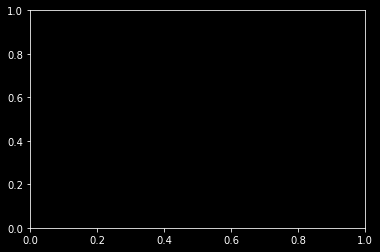

In [13]:
# init our linear regression class / object
lm = LinearRegression()

# Fit our training data
model = lm.fit(X, y)

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print(f'Cross-validated scores: {scores}' )

# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)

print(f'Cross-Predicted Accuracy: {accuracy}')

In [ ]:
https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed
https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

In [3]:
train, test = train_test_split(df, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='target'), df['target'], test_size=0.1, 
    random_state=42
)
x_train = X_train['bmi']
x_test = X_test['bmi']
print(f"X_train shape: {X_train.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(train[['target']].describe().T)
print(f"X_test shape: {X_test.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
test[['target']].describe().T

X_train shape: (397, 10)
x_train shape: (397,)
y_train shape: (397,)

========== Training data ==========


,count,mean,std,min,25%,50%,75%,max
target,397.0000,152.0101,76.9640,25.0000,86.0000,141.0000,209.0000,346.0000


X_test shape: (45, 10)
x_test shape: (45,)
y_test shape: (45,)

========== Test data ==========


,count,mean,std,min,25%,50%,75%,max
target,45.0000,153.2222,79.0943,42.0000,90.0000,129.0000,230.0000,310.0000


In [8]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(model.predict(x_test.values.reshape(-1, 1))[:5])

Intercept: 152.10
Slope: 955.63
[146.1674 187.3669 148.2274 201.7867 132.7776]


In [9]:
class CustomLinearRegression:
    def __init__(self):
        pass
    
    def fit(self, x, y):
        # Calculate stats
        self.n = len(x)
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        self.x_gap = x-self.x_mean
        self.y_gap = y-self.y_mean
        self.ss = np.square(self.x_gap).sum()
        
        # Find coefficients
        self.slope = np.dot(self.x_gap, self.y_gap)/self.ss
        self.intercept = self.y_mean-self.slope*self.x_mean
        
        # Find training error
        y_pred = self.intercept+self.slope*x
        self.se_regression = np.sqrt(
            np.square(y-y_pred).sum()/(self.n-2)
        )
    
    def predict(self, x):
        y_pred = self.intercept+self.slope*x
        return y_pred
    
    def predict_interval(self, x, alpha=0.1):
        t_stat = t.ppf(1-alpha/2, df=self.n-2)
        
        # Calculate interval upper and lower boundaries
        df = pd.DataFrame({'x': x})
        for i, value in df['x'].iteritems():
            se = self.se_regression * np.sqrt(
                1+1/self.n+np.square(value-self.x_mean)/self.ss
            )
            df.loc[i, 'y_pred'] = self.intercept+self.slope*value
            df.loc[i, 'lower'] = df.loc[i, 'y_pred']-t_stat*se
            df.loc[i, 'upper'] = df.loc[i, 'y_pred']+t_stat*se
        return df
        
custom_model = CustomLinearRegression()     
custom_model.fit(x_train, y_train)
print(f"Intercept: {custom_model.intercept:.2f}")
print(f"Slope: {custom_model.slope:.2f}")
custom_pred = custom_model.predict_interval(x_test)
custom_pred.head()

Intercept: 152.10
Slope: 955.63


,x,y_pred,lower,upper
287,-0.0062,146.1674,42.8550,249.4799
211,0.0369,187.3669,83.9760,290.7578
72,-0.0041,148.2274,44.9162,251.5386
321,0.0520,201.7867,98.3167,305.2567
73,-0.0202,132.7776,29.4435,236.1117


# Confidence interval calculator in Python

In [11]:
import numpy as np 
from scipy.stats import t

In [12]:
x = np.random.normal(size=100)

In [19]:
def confidence_interval(x):
    m = x.mean() 
    s = x.std() 
    dof = len(x)-1 
    confidence = 0.95
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    lower = m-s*t_crit/np.sqrt(len(x))
    upper = m+s*t_crit/np.sqrt(len(x))
    return lower, upper

In [20]:
lower, upper = confidence_interval(x)

In [14]:
def confidence_interval(df):
    dof = len(df) -1 
    confidence = 0.99
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    inter =  t_crit * (df['prediction'].std()/np.sqrt(len(df)))
    #inter = df['prediction'].std()
    print(inter)
    df['lower'] = df['prediction'] - inter 
    df['upper'] = df['prediction'] + inter 
    # df_int_2 = confidence_interval(df_int) 
    return df

(-0.2193386827410922, 0.16173905631567265)

In [30]:
pima.dtypes

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object

In [31]:
pima['pregnant'] = pima['pregnant'].astype(float)
pima['glucose'] = pima['glucose'].astype(float)
pima['bp'] = pima['bp'].astype(float)
pima['skin'] = pima['skin'].astype(float)
pima['insulin'] = pima['insulin'].astype(float)
pima['bmi'] = pima['bmi'].astype(float)
pima['pedigree'] = pima['pedigree'].astype(float)
pima['age'] = pima['age'].astype(float)
pima['label'] = pima['label'].astype(float)

Feature Selection

In [32]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Evaluating Model


In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


Visualizing Decision Trees

In [36]:
!pip install graphviz 
!pip install pydotplus

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [58]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file='tree.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


^
Expected {'graph' | 'digraph'}  (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'write_png'

In [59]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True
                                )
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("./tree_iris.png")

NameError: name 'tree' is not defined

Secound

In [52]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [47]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])
  

In [49]:
X = dataset[:, 1:2].astype(int) 
y = dataset[:, 2].astype(int) 

In [50]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred = regressor.predict([[3750]])
  
# print the predicted price
print("Predicted price: % d\n"% y_pred) 

Predicted price:  8000



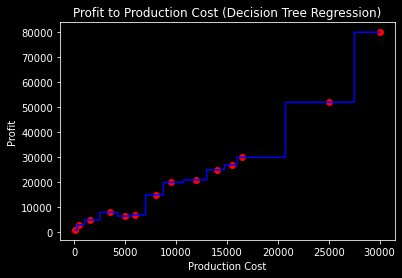

In [54]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

In [55]:

# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Production Cost']) 

In [61]:
from sklearn import tree

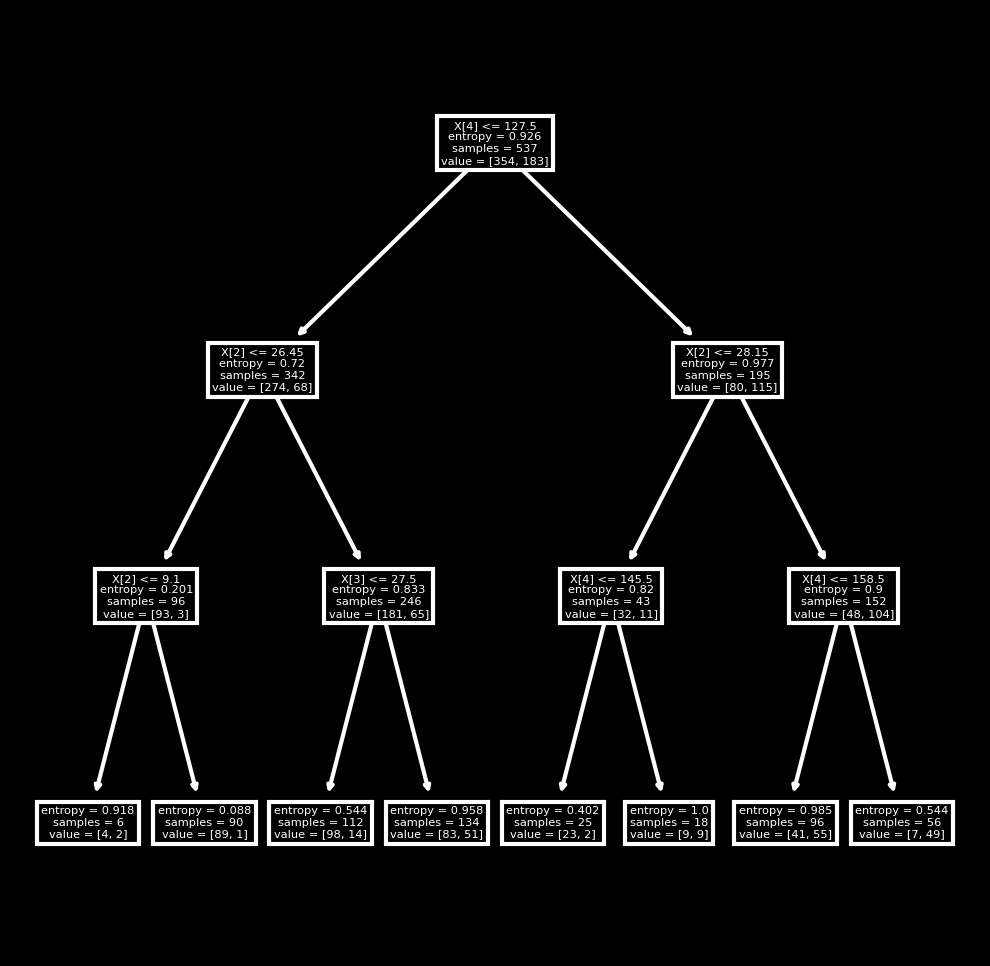

In [71]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)


tree.plot_tree(clf);

In [ ]:
# https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

In [ ]:
https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html